Question 2

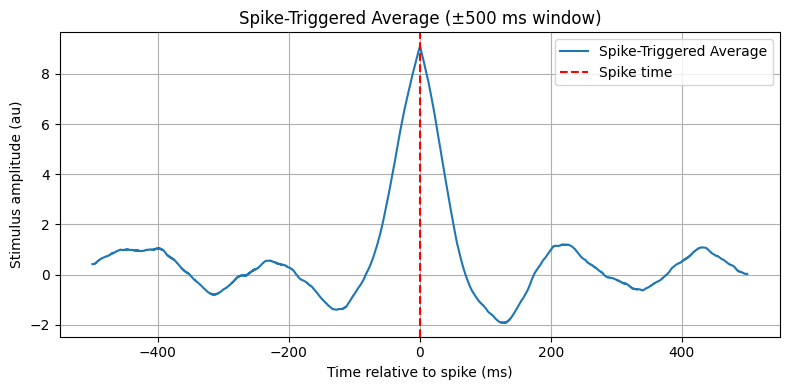

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
sampling_rate = 2000  # Hz
window_ms = 500
window_samples = int(window_ms * sampling_rate / 1000)  # ±500 ms → 1000 samples

# Load data
stim = pd.read_csv('stimSig.csv', header=None).values.flatten()
spikes = pd.read_csv('spikeTrain.csv', header=None).values.flatten()

# Find spike times (indices where value is 1)
spike_indices = np.where(spikes == 1)[0]

# Filter out spikes too close to start or end
valid_spikes = [i for i in spike_indices if i > window_samples and i < len(stim) - window_samples]

# Collect stimulus segments around spikes
segments = np.array([stim[i - window_samples:i + window_samples] for i in valid_spikes])

# Compute the STA
sta = np.mean(segments, axis=0)

# Create time axis
time_axis = np.linspace(-window_ms, window_ms, 2 * window_samples)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(time_axis, sta, label='Spike-Triggered Average')
plt.axvline(0, color='red', linestyle='--', label='Spike time')
plt.xlabel('Time relative to spike (ms)')
plt.ylabel('Stimulus amplitude (au)')
plt.title('Spike-Triggered Average (±500 ms window)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Question 4

120000


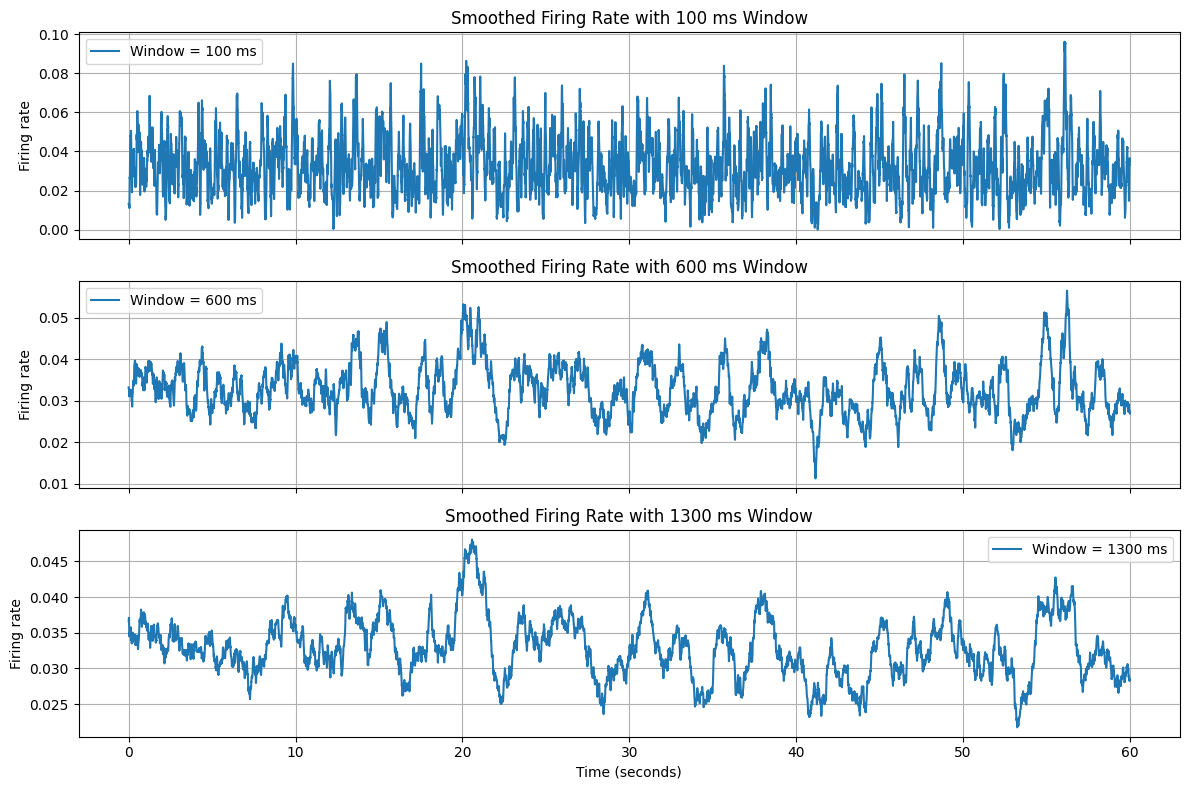

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d


stim = pd.read_csv("stim_kernel.csv", header=None).values.flatten()
resp = pd.read_csv("resp.csv", header=None).values  # shape: (100, 60000)
resp_clean = resp[1:, :]
print(stim.size)
# rate = mean across rows
rate_raw = np.mean(resp_clean, axis=0)  # shape: (60000,)

window_sizes = [100, 600, 1300]  

fig, axes = plt.subplots(len(window_sizes), 1, figsize=(12, 8), sharex=True)
for i, win in enumerate(window_sizes):
    rate_smoothed = uniform_filter1d(rate_raw, size=win)
    time = np.arange(len(rate_smoothed)) / 1000  # in seconds

    axes[i].plot(time, rate_smoothed, label=f"Window = {win} ms", color='C0')
    axes[i].set_ylabel("Firing rate")
    axes[i].set_title(f"Smoothed Firing Rate with {win} ms Window")
    axes[i].grid(True)
    axes[i].legend()

axes[-1].set_xlabel("Time (seconds)")
plt.tight_layout()
plt.show()

59999.0


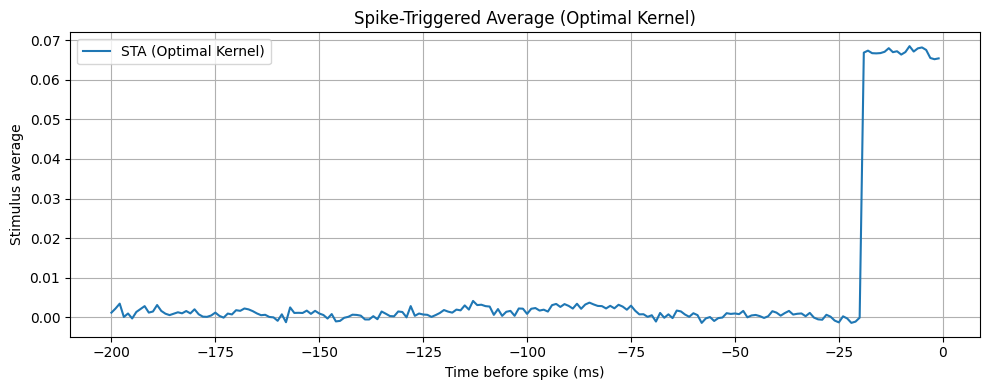

In [ ]:
stim_clean = stim[60000:]  # הסרת 60 הערכים הראשונים

print(stim[59999])  

#window size for STA
sta_window = 200
spike_triggered_stimuli = []

for trial in resp_clean:
    spike_times = np.where(trial == 1)[0]
    for t in spike_times:
        if t >= sta_window:
            snippet = stim_clean[t - sta_window:t]
            spike_triggered_stimuli.append(snippet)
sta_matrix = np.array(spike_triggered_stimuli)
STA = np.mean(sta_matrix, axis=0)

sta_window = len(STA)
sta_time = np.arange(-sta_window, 0)

plt.figure(figsize=(10, 4))
plt.plot(sta_time, STA, label="STA (Optimal Kernel)")
plt.xlabel("Time before spike (ms)")
plt.ylabel("Stimulus average")
plt.title("Spike-Triggered Average (Optimal Kernel)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



